In [104]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()
%matplotlib inline

def load_data(filename):
    """
    Funzione per il parsing di una serie intraday 
    con estensione txt esportata da Tradestation
    """
    data = pd.read_csv(filename, 
                       usecols=['Date','Time','Open','High','Low','Close','Up','Down'], 
                       parse_dates=[['Date', 'Time']], )
    data.columns = ['date_time','open','high','low','close','up','down']
    data.set_index('date_time', inplace = True)
    data['volume'] = data['up'] + data['down']
    data.drop(['up','down'], axis=1, inplace=True)
    print("Il file contiene", len(data), "record")
    return data

startDate = "20070101"
endDate = "20190914"
filename = "@GC_1380min_Exchange.txt"
dataset = load_data(filename)
startDateParsed = datetime.date(int(startDate[0:4]), int(startDate[4:6]), int(startDate[6:]))
endDateParsed = datetime.date(int(endDate[0:4]), int(endDate[4:6]), int(endDate[6:]))
dataset = dataset.loc[startDateParsed:endDateParsed]
dataset["DOM"] = dataset.index.day
dataset["Month"] = dataset.index.month
dataset["DeltaClosePerc"] = round((dataset.close - dataset.close.shift(1)) / dataset.close.shift(1) * 100,2)
dataset["CloseOpenPerc"] = round((dataset.close - dataset.open) / dataset.open * 100,2)
dataset.tail(10)

Il file contiene 3306 record


,open,high,low,close,volume,DOM,Month,DeltaClosePerc,CloseOpenPerc
date_time,,,,,,,,,
2019-09-02 17:00:00,1535.2,1544.5,1528.0,1538.1,134193,2,9,0.58,0.19
2019-09-03 17:00:00,1539.2,1558.9,1530.5,1556.3,401313,3,9,1.18,1.11
2019-09-04 17:00:00,1556.0,1566.2,1542.6,1561.6,395553,4,9,0.34,0.36
2019-09-05 17:00:00,1561.4,1561.9,1514.3,1527.1,579556,5,9,-2.21,-2.20
2019-09-06 17:00:00,1525.6,1536.2,1510.7,1515.0,530085,6,9,-0.79,-0.69
2019-09-09 17:00:00,1516.4,1523.8,1505.5,1507.1,307690,9,9,-0.52,-0.61
2019-09-10 17:00:00,1507.0,1509.1,1492.1,1493.8,387119,10,9,-0.88,-0.88
2019-09-11 17:00:00,1493.9,1506.2,1492.9,1505.1,292231,11,9,0.76,0.75
2019-09-12 17:00:00,1504.9,1532.2,1496.8,1506.8,478441,12,9,0.11,0.13


In [105]:
daily = dataset.resample('D').mean().dropna()
daily.tail(10)

,open,high,low,close,volume,DOM,Month,DeltaClosePerc,CloseOpenPerc
date_time,,,,,,,,,
2019-09-02,1535.2,1544.5,1528.0,1538.1,134193.0,2.0,9.0,0.58,0.19
2019-09-03,1539.2,1558.9,1530.5,1556.3,401313.0,3.0,9.0,1.18,1.11
2019-09-04,1556.0,1566.2,1542.6,1561.6,395553.0,4.0,9.0,0.34,0.36
2019-09-05,1561.4,1561.9,1514.3,1527.1,579556.0,5.0,9.0,-2.21,-2.20
2019-09-06,1525.6,1536.2,1510.7,1515.0,530085.0,6.0,9.0,-0.79,-0.69
2019-09-09,1516.4,1523.8,1505.5,1507.1,307690.0,9.0,9.0,-0.52,-0.61
2019-09-10,1507.0,1509.1,1492.1,1493.8,387119.0,10.0,9.0,-0.88,-0.88
2019-09-11,1493.9,1506.2,1492.9,1505.1,292231.0,11.0,9.0,0.76,0.75
2019-09-12,1504.9,1532.2,1496.8,1506.8,478441.0,12.0,9.0,0.11,0.13


In [106]:
daily[(daily['Month'] == 1) & (daily['DOM'] == 2)]

,open,high,low,close,volume,DOM,Month,DeltaClosePerc,CloseOpenPerc
date_time,,,,,,,,,
2008-01-02,1020.0,1047.4,1020.0,1043.0,102108.0,2.0,1.0,2.28,2.25
2009-01-02,1037.5,1043.6,1022.6,1030.4,41155.0,2.0,1.0,-0.68,-0.68
2013-01-02,1786.0,1805.0,1780.5,1796.8,102314.0,2.0,1.0,0.61,0.60
2014-01-02,1308.7,1335.0,1306.7,1327.7,120071.0,2.0,1.0,1.43,1.45
2015-01-02,1285.1,1296.0,1268.4,1289.8,108549.0,2.0,1.0,0.37,0.37
2018-01-02,1368.6,1383.7,1367.9,1382.4,256026.0,2.0,1.0,1.02,1.01
2019-01-02,1315.9,1321.9,1311.5,1317.4,210922.0,2.0,1.0,0.14,0.11


In [107]:
daily[(daily['Month'] == 2) & (daily['DOM'] == 29)]

,open,high,low,close,volume,DOM,Month,DeltaClosePerc,CloseOpenPerc
date_time,,,,,,,,,
2008-02-29,1149.6,1155.0,1142.7,1152.2,98733.0,29.0,2.0,0.25,0.23
2012-02-29,1908.0,1914.1,1810.2,1820.0,308392.0,29.0,2.0,-4.58,-4.61
2016-02-29,1320.6,1339.3,1313.8,1336.8,162575.0,29.0,2.0,1.25,1.23


In [108]:
months = []

for month in range(1,13):
    months.append(month)

daysofmonth31 = []
daysofmonth30 = []
daysofmonth29 = []

for day in range(1,32):
    daysofmonth31.append(day)
for day in range(1,30):
    daysofmonth29.append(day)
for day in range(1,31):
    daysofmonth30.append(day)

print(months)
print(daysofmonth31)
print(daysofmonth30)
print(daysofmonth29)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [109]:
seasonality = []

for month in months:
    if month == 2:
        for day in daysofmonth29:
            seasonality.append(round(daily[(daily['DOM'] == day) & 
                                           (daily['Month'] == month)]['DeltaClosePerc'].mean(),6))
            
    if month == 11 or month == 4 or month == 6 or month == 9:
        for day in daysofmonth30:
            seasonality.append(round(daily[(daily['DOM'] == day) & 
                                           (daily['Month'] == month)]['DeltaClosePerc'].mean(),6))
            
    if month == 1 or month == 3 or month == 5 or month == 7 or month == 8 or month == 10 or month == 12:
        for day in daysofmonth31:
            seasonality.append(round(daily[(daily['DOM'] == day) & 
                                    (daily['Month'] == month)]['DeltaClosePerc'].mean(),6))
    
print(len(seasonality))

seasonality = pd.DataFrame(seasonality).dropna()
seasonality.columns = ['Daily_Seasonality']
#seasonality['Equity'] = seasonality['Daily_Seasonality'].cumsum()
seasonality['Equity'] = ((seasonality['Daily_Seasonality'] / 100 + 1).cumprod() - 1) * 100
seasonality.tail()

366


,Daily_Seasonality,Equity
361,0.141250,7.219288
362,0.115556,7.343186
363,0.100000,7.450529
364,-0.175000,7.262491
365,0.243333,7.523496


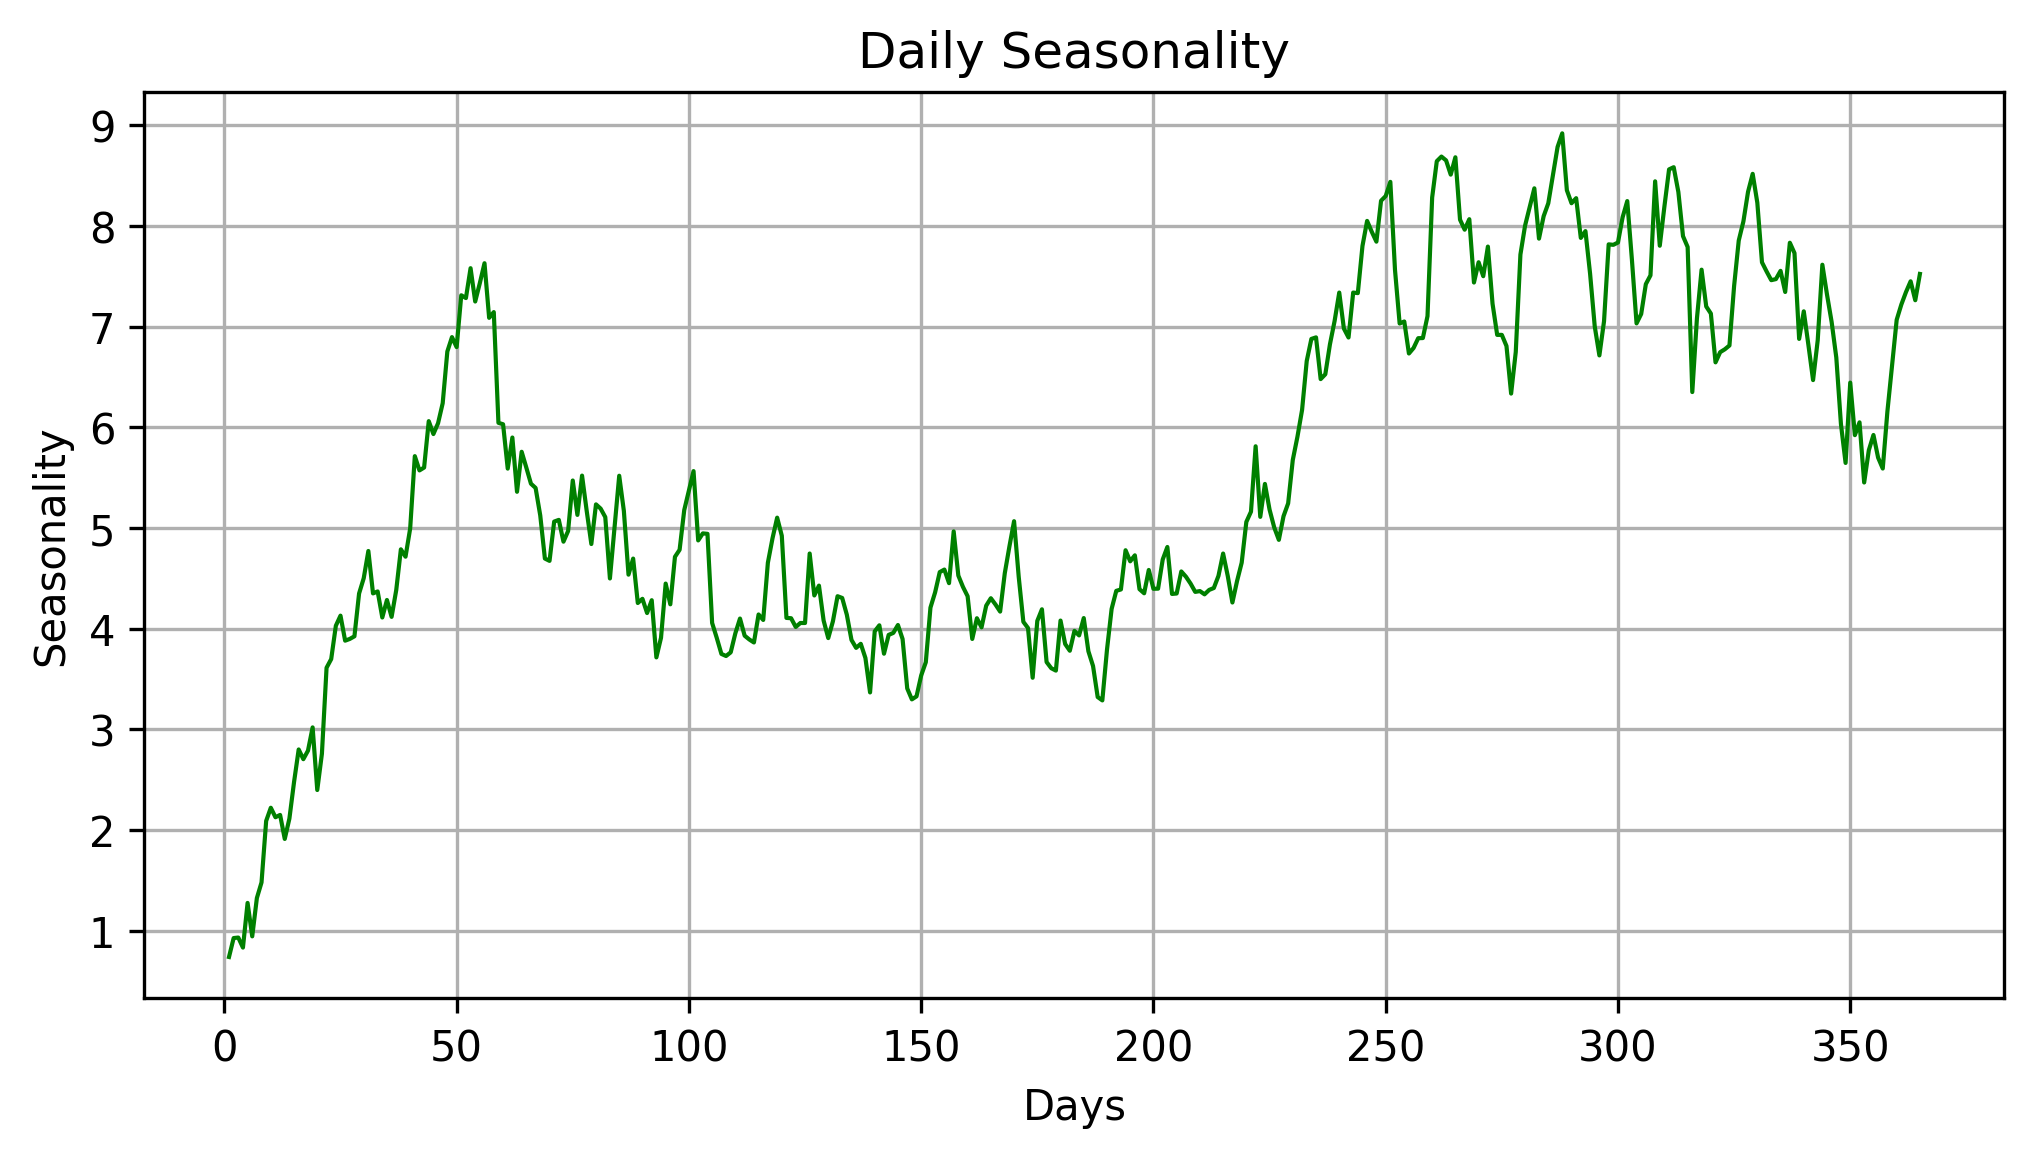

In [110]:
plt.figure(figsize=(8,4), dpi=300)

ap = seasonality['Equity'].dropna()

plt.plot(ap, color='green', linewidth=1)

plt.xlabel("Days")
plt.ylabel("Seasonality")
plt.title('Daily Seasonality')
plt.grid(True)
plt.show()

In [111]:
seasonality['Equity'].dropna().iplot(kind='line',bins=366, color='green', width=2, title = "Daily Seasonality", 
                                     xaxis_title = "Days", yaxis_title = "Seasonality")

In [9]:
intraday_seasonality = []
daily_seasonality = []

for month in months:
    if month == 2:
        for day in daysofmonth29:
            daily_seasonality.append(round(daily[(daily['DOM'] == day) & 
                                                 (daily['Month'] == month)]['DeltaClosePerc'].mean(),2))
            intraday_seasonality.append(round(daily[(daily['DOM'] == day) & 
                                                    (daily['Month'] == month)]['CloseOpenPerc'].mean(),2))

    if month == 11 or month == 4 or month == 6 or month == 9:
        for day in daysofmonth30:
            daily_seasonality.append(round(daily[(daily['DOM'] == day) & 
                                                 (daily['Month'] == month)]['DeltaClosePerc'].mean(),2))
            intraday_seasonality.append(round(daily[(daily['DOM'] == day) & 
                                                    (daily['Month'] == month)]['CloseOpenPerc'].mean(),2))

    if month == 1 or month == 3 or month == 5 or month == 7 or month == 8 or month == 10 or month == 12:
        for day in daysofmonth31:
            daily_seasonality.append(round(daily[(daily['DOM'] == day) & 
                                                (daily['Month'] == month)]['DeltaClosePerc'].mean(),2))
            intraday_seasonality.append(round(daily[(daily['DOM'] == day) & 
                                                (daily['Month'] == month)]['CloseOpenPerc'].mean(),2))

s1 = pd.DataFrame(daily_seasonality)
s1.columns = ['Daily_Seasonality']
s1['Daily_Seasonality_Equity'] = s1['Daily_Seasonality'].cumsum()
s2 = pd.DataFrame(intraday_seasonality)
s2.columns = ['Intraday_Seasonality']
s2['Intraday_Seasonality_Equity'] = s2['Intraday_Seasonality'].cumsum()

date = pd.DataFrame(pd.date_range('1/1/2016', periods=366, freq='D')) # Usiamo la serie di un anno bisestile
seasonality = pd.concat([date, s1, s2], axis=1)
seasonality.index = seasonality[0]
seasonality.index.names = (['Date'])
seasonality.drop(0, axis=1, inplace=True)
seasonality.tail(10)

,Daily_Seasonality,Daily_Seasonality_Equity,Intraday_Seasonality,Intraday_Seasonality_Equity
Date,,,,
2016-12-22,-0.21,5.83,-0.25,2.09
2016-12-23,-0.10,5.73,-0.12,1.97
2016-12-24,0.54,6.27,0.52,2.49
2016-12-25,NaN,NaN,NaN,NaN
2016-12-26,0.86,7.13,0.88,3.37
2016-12-27,0.14,7.27,0.15,3.52
2016-12-28,0.12,7.39,0.10,3.62
2016-12-29,0.10,7.49,0.07,3.69
2016-12-30,-0.18,7.31,-0.20,3.49


In [10]:
seasonality.Daily_Seasonality[seasonality.Daily_Seasonality != seasonality.Daily_Seasonality]

Date
2016-01-01   NaN
2016-12-25   NaN
Name: Daily_Seasonality, dtype: float64

In [11]:
seasonality = seasonality.dropna() # Eliminiamo i record vuoti del 1 gennaio e del 25 dicembre
print("Numero di record:", len(seasonality))

Numero di record: 364


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:102: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



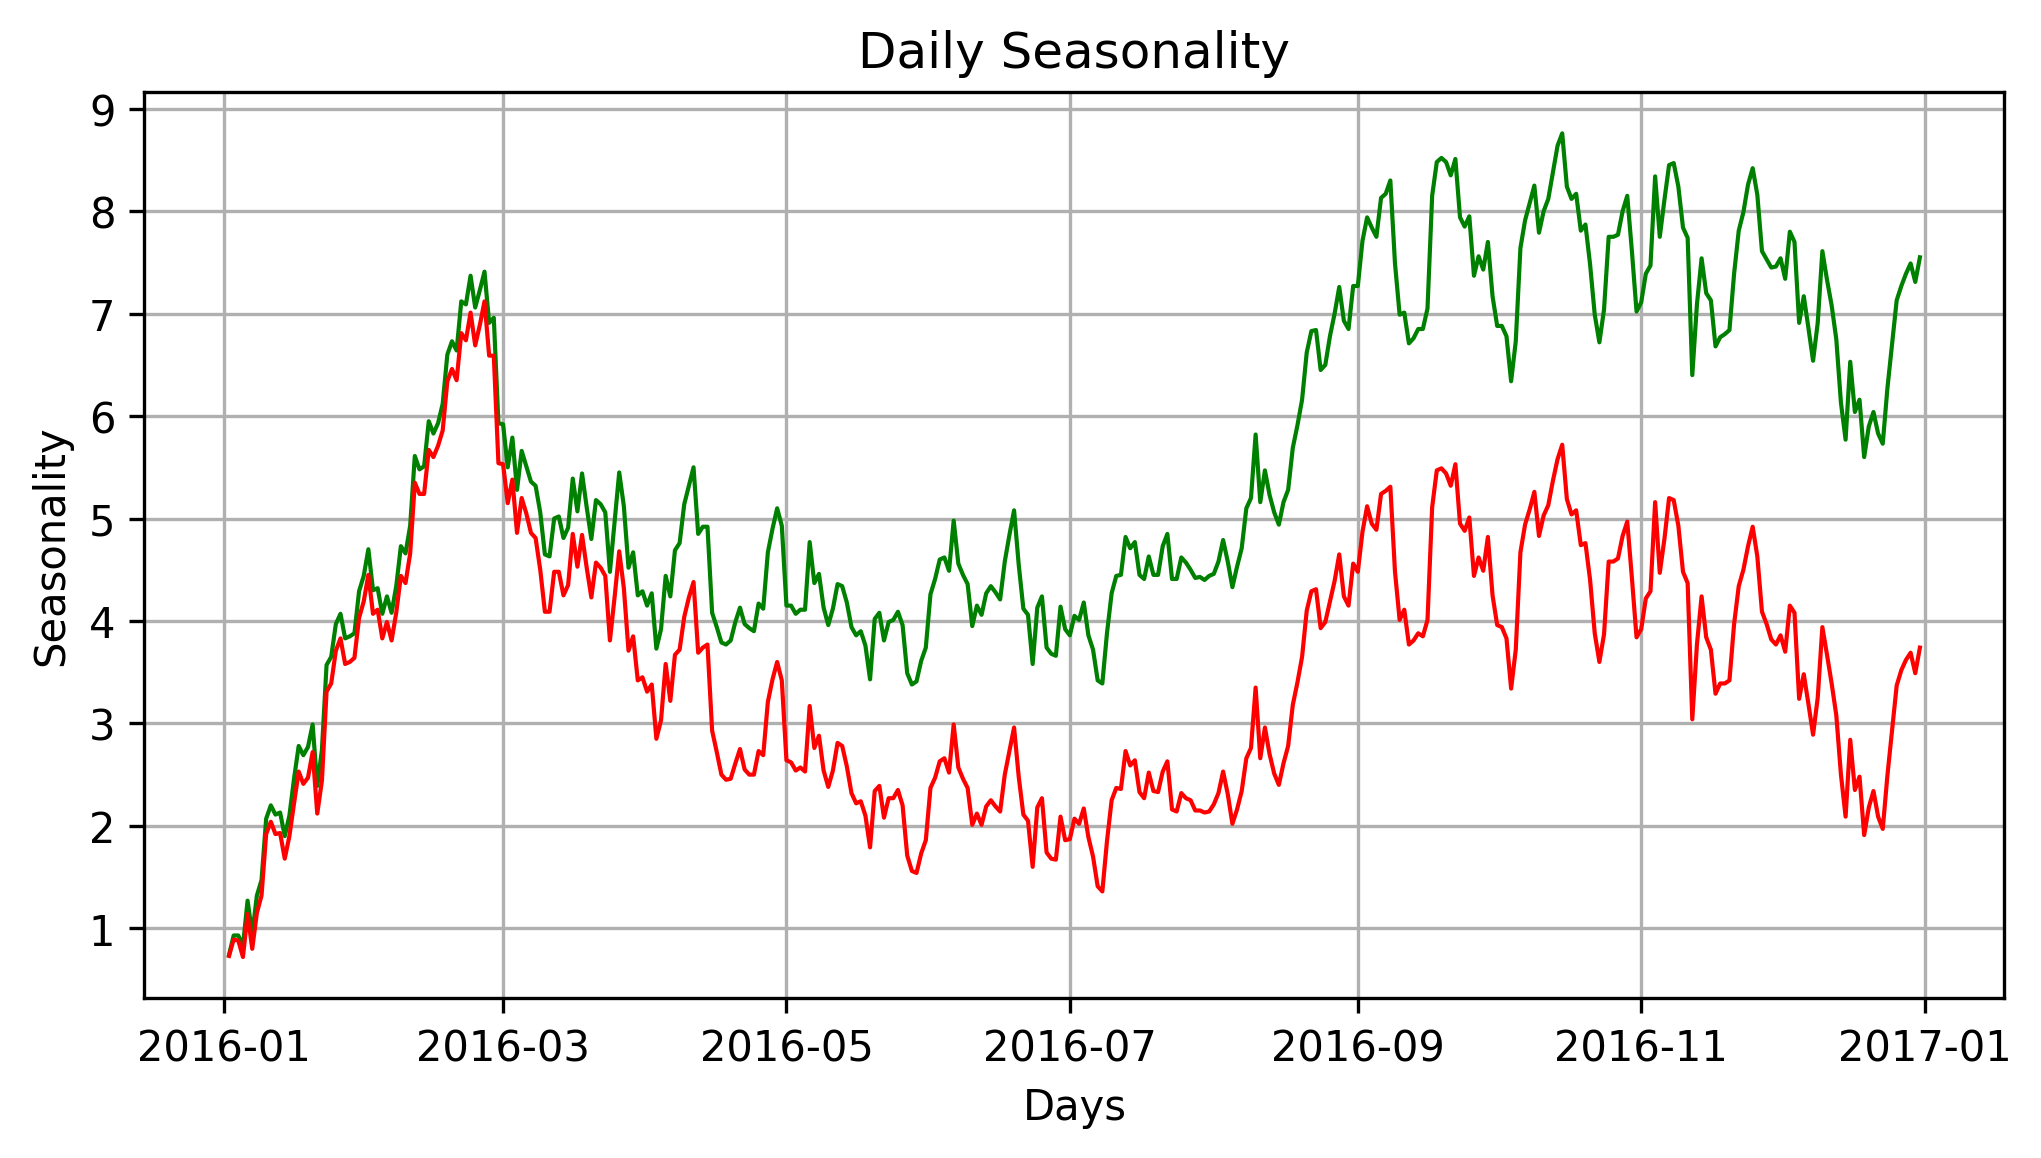

In [12]:
plt.figure(figsize=(8,4), dpi=300)

plt.plot(seasonality['Daily_Seasonality_Equity'], color='green', linewidth=1)
plt.plot(seasonality['Intraday_Seasonality_Equity'], color='red', linewidth=1)

plt.xlabel("Days")
plt.ylabel("Seasonality")
plt.title('Daily Seasonality')
plt.grid(True)
plt.show()

In [13]:
show = seasonality.copy()
show.drop(["Daily_Seasonality","Intraday_Seasonality"], axis = 1, inplace = True)
show.head(10)

,Daily_Seasonality_Equity,Intraday_Seasonality_Equity
Date,,
2016-01-02,0.74,0.73
2016-01-03,0.93,0.89
2016-01-04,0.93,0.88
2016-01-05,0.83,0.72
2016-01-06,1.27,1.14
2016-01-07,0.94,0.80
2016-01-08,1.32,1.15
2016-01-09,1.47,1.32
2016-01-10,2.07,1.92


In [14]:
show.iplot(kind="line", color = ["green","red"], width=2, showlegend=True, title = "Daily Seasonality", 
                                     xaxis_title = "Days", yaxis_title = "Seasonality")

# Analisi periodo specifico:

In [23]:
years = daily.resample('A').mean().index.year
print(years)

Int64Index([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
            2018, 2019],
           dtype='int64', name='date_time')


In [101]:
startPeriod = {"day": 1, "month": 1}
endPeriod = {"day": 24, "month": 2}
direction = "long"

checkOK = []
checkKO = []
values = []

def PeriodStats(equity):
    if direction == "long":
        if equity[-1] > 0:
            return 1, round(equity[-1],4)
        else:
            return 0, round(equity[-1],4)
    if direction == "short":
        if equity[-1] < 0:
            return 1, round(equity[-1],4)
        else:
            return 0, round(equity[-1],4)

for year in years:
    start = datetime.date(int(year), int(startPeriod['month']), int(startPeriod['day']))
    end = datetime.date(int(year), int(endPeriod['month']), int(endPeriod['day']))
    period = daily.loc[start:end]
    if daily.loc[start:end].empty == False:
        equity = period['DeltaClosePerc'].cumsum()
        checkOK.append(3(equity)[0])
        values.append(PeriodStats(equity)[1])
        if checkOK[-1] == 1:
            print("Analisi dal", start, "al", end, "- CHECK OK: percentuale cumulata di periodo ", 
                  PeriodStats(equity)[1], "%")
        else:
            print("Analisi dal", start, "al", end, "- CHECK KO: percentuale cumulata di periodo ", 
                  PeriodStats(equity)[1], "%")

print("")
Result = round(sum(checkOK)/len(years)*100,2)
print("Percentuale occorrenze positive annuali:", Result, "% equivalente a", sum(checkOK), "su", 
      len(years), "anni", "per una media del", round(sum(values)/len(values),2), "%")

Analisi dal 2007-01-01 al 2007-02-24 - CHECK OK: percentuale cumulata di periodo  4.33 %
Analisi dal 2008-01-01 al 2008-02-24 - CHECK OK: percentuale cumulata di periodo  10.02 %
Analisi dal 2009-01-01 al 2009-02-24 - CHECK OK: percentuale cumulata di periodo  7.85 %
Analisi dal 2010-01-01 al 2010-02-24 - CHECK OK: percentuale cumulata di periodo  0.17 %
Analisi dal 2011-01-01 al 2011-02-24 - CHECK KO: percentuale cumulata di periodo  -1.19 %
Analisi dal 2012-01-01 al 2012-02-24 - CHECK OK: percentuale cumulata di periodo  11.49 %
Analisi dal 2013-01-01 al 2013-02-24 - CHECK KO: percentuale cumulata di periodo  -5.56 %
Analisi dal 2014-01-01 al 2014-02-24 - CHECK OK: percentuale cumulata di periodo  9.75 %
Analisi dal 2015-01-01 al 2015-02-24 - CHECK OK: percentuale cumulata di periodo  1.36 %
Analisi dal 2016-01-01 al 2016-02-24 - CHECK OK: percentuale cumulata di periodo  13.81 %
Analisi dal 2017-01-01 al 2017-02-24 - CHECK OK: percentuale cumulata di periodo  8.13 %
Analisi dal 2018

In [102]:
startPeriod = {"day": 26, "month": 2}
endPeriod = {"day": 11, "month": 3}
direction = "short"

checkOK = []
checkKO = []
values = []

def PeriodStats(equity):
    if direction == "long":
        if equity[-1] > 0:
            return 1, round(equity[-1],4)
        else:
            return 0, round(equity[-1],4)
    if direction == "short":
        if equity[-1] < 0:
            return 1, round(equity[-1],4)
        else:
            return 0, round(equity[-1],4)

for year in years:
    start = datetime.date(int(year), int(startPeriod['month']), int(startPeriod['day']))
    end = datetime.date(int(year), int(endPeriod['month']), int(endPeriod['day']))
    period = daily.loc[start:end]
    if daily.loc[start:end].empty == False:
        equity = period['DeltaClosePerc'].cumsum()
        checkOK.append(PeriodStats(equity)[0])
        values.append(PeriodStats(equity)[1])
        if checkOK[-1] == 1:
            print("Analisi dal", start, "al", end, "- CHECK OK: percentuale cumulata di periodo ", 
                  PeriodStats(equity)[1], "%")
        else:
            print("Analisi dal", start, "al", end, "- CHECK KO: percentuale cumulata di periodo ", 
                  PeriodStats(equity)[1], "%")

print("")
Result = round(sum(checkOK)/len(years)*100,2)
print("Percentuale occorrenze positive annuali:", Result, "% equivalente a", sum(checkOK), "su", 
      len(years), "anni", "per una media del", round(sum(values)/len(values),2), "%")

Analisi dal 2007-02-26 al 2007-03-11 - CHECK OK: percentuale cumulata di periodo  -3.96 %
Analisi dal 2008-02-26 al 2008-03-11 - CHECK KO: percentuale cumulata di periodo  2.97 %
Analisi dal 2009-02-26 al 2009-03-11 - CHECK OK: percentuale cumulata di periodo  -4.13 %
Analisi dal 2010-02-26 al 2010-03-11 - CHECK KO: percentuale cumulata di periodo  0.2 %
Analisi dal 2011-02-26 al 2011-03-11 - CHECK KO: percentuale cumulata di periodo  0.46 %
Analisi dal 2012-02-26 al 2012-03-11 - CHECK OK: percentuale cumulata di periodo  -3.02 %
Analisi dal 2013-02-26 al 2013-03-11 - CHECK OK: percentuale cumulata di periodo  -0.74 %
Analisi dal 2014-02-26 al 2014-03-11 - CHECK KO: percentuale cumulata di periodo  0.65 %
Analisi dal 2015-02-26 al 2015-03-11 - CHECK OK: percentuale cumulata di periodo  -3.87 %
Analisi dal 2016-02-26 al 2016-03-11 - CHECK KO: percentuale cumulata di periodo  1.35 %
Analisi dal 2017-02-26 al 2017-03-11 - CHECK OK: percentuale cumulata di periodo  -4.05 %
Analisi dal 2018

In [103]:
startPeriod = {"day": 23, "month": 12}
endPeriod = {"day": 31, "month": 12}
direction = "long"

checkOK = []
checkKO = []
values = []

def PeriodStats(equity):
    if direction == "long":
        if equity[-1] > 0:
            return 1, round(equity[-1],4)
        else:
            return 0, round(equity[-1],4)
    if direction == "short":
        if equity[-1] < 0:
            return 1, round(equity[-1],4)
        else:
            return 0, round(equity[-1],4)

for year in years:
    start = datetime.date(int(year), int(startPeriod['month']), int(startPeriod['day']))
    end = datetime.date(int(year), int(endPeriod['month']), int(endPeriod['day']))
    period = daily.loc[start:end]
    if daily.loc[start:end].empty == False:
        equity = period['DeltaClosePerc'].cumsum()
        checkOK.append(PeriodStats(equity)[0])
        values.append(PeriodStats(equity)[1])
        if checkOK[-1] == 1:
            print("Analisi dal", start, "al", end, "- CHECK OK: percentuale cumulata di periodo ", 
                  PeriodStats(equity)[1], "%")
        else:
            print("Analisi dal", start, "al", end, "- CHECK KO: percentuale cumulata di periodo ", 
                  PeriodStats(equity)[1], "%")

print("")
Result = round(sum(checkOK)/len(years)*100,2)
print("Percentuale occorrenze positive annuali:", Result, "% equivalente a", sum(checkOK), "su", 
      len(years), "anni", "per una media del", round(sum(values)/len(values),2), "%")

Analisi dal 2007-12-23 al 2007-12-31 - CHECK OK: percentuale cumulata di periodo  2.16 %
Analisi dal 2008-12-23 al 2008-12-31 - CHECK OK: percentuale cumulata di periodo  3.43 %
Analisi dal 2009-12-23 al 2009-12-31 - CHECK OK: percentuale cumulata di periodo  1.06 %
Analisi dal 2010-12-23 al 2010-12-31 - CHECK OK: percentuale cumulata di periodo  2.37 %
Analisi dal 2011-12-23 al 2011-12-31 - CHECK KO: percentuale cumulata di periodo  -2.35 %
Analisi dal 2012-12-23 al 2012-12-31 - CHECK OK: percentuale cumulata di periodo  1.04 %
Analisi dal 2013-12-23 al 2013-12-31 - CHECK OK: percentuale cumulata di periodo  0.19 %
Analisi dal 2014-12-23 al 2014-12-31 - CHECK OK: percentuale cumulata di periodo  0.59 %
Analisi dal 2015-12-23 al 2015-12-31 - CHECK KO: percentuale cumulata di periodo  -0.96 %
Analisi dal 2016-12-23 al 2016-12-31 - CHECK OK: percentuale cumulata di periodo  1.82 %
Analisi dal 2017-12-23 al 2017-12-31 - CHECK OK: percentuale cumulata di periodo  1.92 %
Analisi dal 2018-12